<a href="https://colab.research.google.com/github/xromeo/MSDC/blob/main/Generate_dataset_0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/foo.txt

Hello Google Drive!

In [ ]:
import os
import random
import shutil
import cv2


hr_shape = (256, 256)
lr_shape = (64, 64)

# Directorio de entrada
input_dir = '/content/drive/My Drive/bolivia_dataset'

# Directorios de salida
output_dir = '/content/drive/My Drive/dataset'
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')

# Crear directorios de entrenamiento y prueba
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Obtener la lista de imágenes
image_files = os.listdir(input_dir)
random.shuffle(image_files)

# Calcular el número de imágenes para el conjunto de entrenamiento y prueba
total_images = len(image_files)
train_ratio = 1
num_train = int(total_images * train_ratio)

# Dividir las imágenes en el conjunto de entrenamiento y prueba
train_files = image_files[:num_train]
test_files = image_files[num_train:]

# Crear directorios hr y lr dentro del directorio de entrenamiento
train_hr_dir = os.path.join(train_dir, 'hr')
train_lr_dir = os.path.join(train_dir, 'lr')
os.makedirs(train_hr_dir, exist_ok=True)
os.makedirs(train_lr_dir, exist_ok=True)

# Crear directorios hr y lr dentro del directorio de prueba
test_hr_dir = os.path.join(test_dir, 'hr')
test_lr_dir = os.path.join(test_dir, 'lr')
os.makedirs(test_hr_dir, exist_ok=True)
os.makedirs(test_lr_dir, exist_ok=True)

# Función para redimensionar las imágenes y guardarlas con el nuevo nombre
def resize_and_save_image(src_path, dst_path, target_size):
    img = cv2.imread(src_path)
    img = cv2.resize(img, target_size)
    cv2.imwrite(dst_path, img)

# Redimensionar las imágenes y copiarlas a los directorios correspondientes
for i, file in enumerate(train_files):
    src_path = os.path.join(input_dir, file)
    hr_dst_path = os.path.join(train_hr_dir, f'hr_{i}.jpg')
    lr_dst_path = os.path.join(train_lr_dir, f'lr_{i}.jpg')

    resize_and_save_image(src_path, hr_dst_path, hr_shape)

    resize_and_save_image(src_path, lr_dst_path, lr_shape)

for i, file in enumerate(test_files):
    src_path = os.path.join(input_dir, file)
    hr_dst_path = os.path.join(test_hr_dir, f'hr_{i}.jpg')
    lr_dst_path = os.path.join(test_lr_dir, f'lr_{i}.jpg')
    resize_and_save_image(src_path, hr_dst_path, hr_shape)
    resize_and_save_image(src_path, lr_dst_path,  lr_shape)

print("División de datos completada.")


División de datos completada.


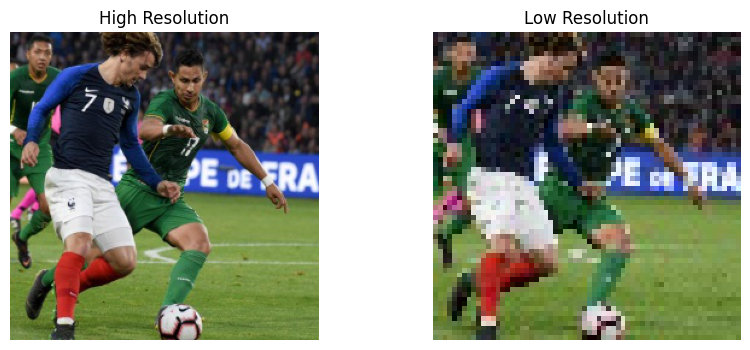

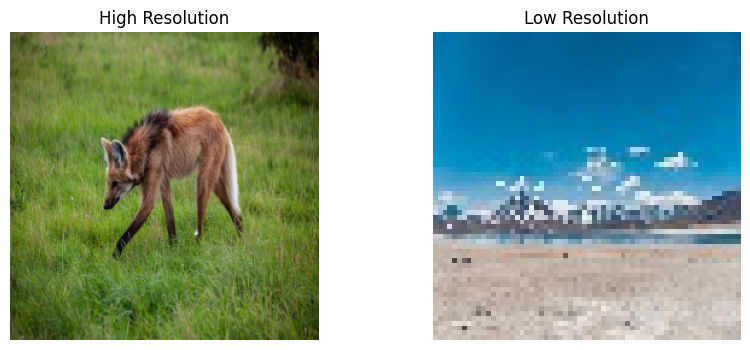

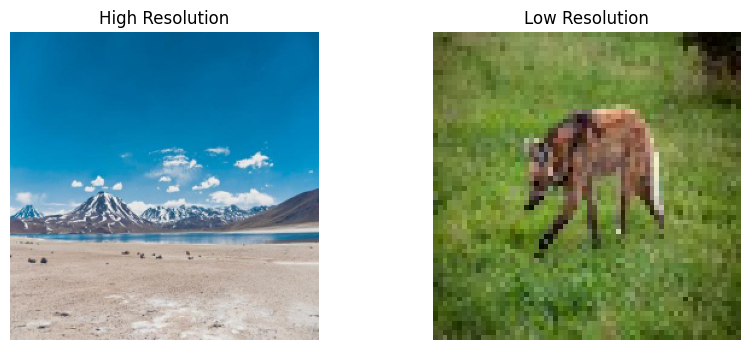

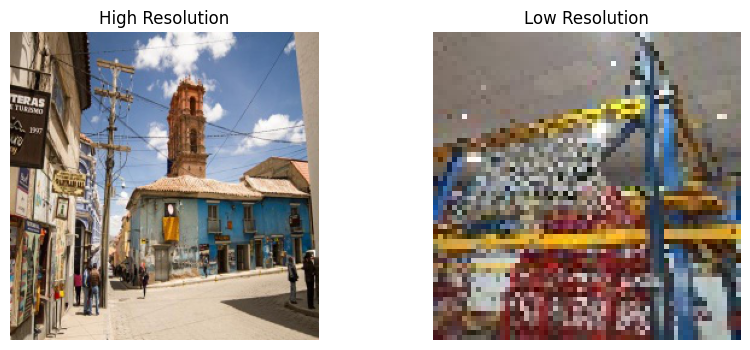

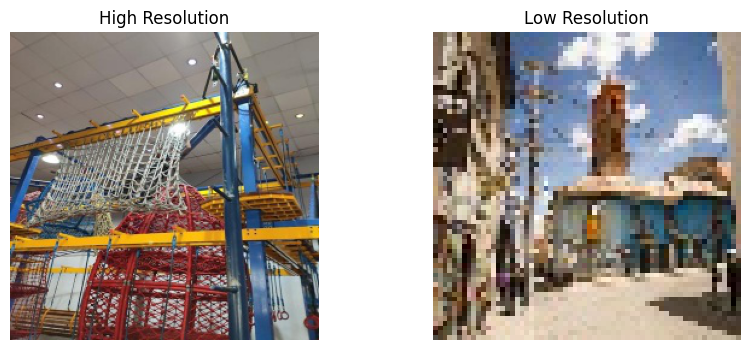

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# Directorios de entrenamiento
train_hr_dir = '/content/drive/My Drive/dataset/train/hr'
train_lr_dir = '/content/drive/My Drive/dataset/train/lr'

# Obtener lista de imágenes en los directorios
hr_images = os.listdir(train_hr_dir)
lr_images = os.listdir(train_lr_dir)

# Mostrar 5 imágenes de los directorios train/hr y train/lr
num_images = 5

for i in range(num_images):
    # Cargar imágenes hr y lr
    hr_image_path = os.path.join(train_hr_dir, hr_images[i])
    lr_image_path = os.path.join(train_lr_dir, lr_images[i])

    hr_image = load_img(hr_image_path)
    lr_image = load_img(lr_image_path)

    # Mostrar las imágenes
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(hr_image)
    plt.title('High Resolution')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(lr_image)
    plt.title('Low Resolution')
    plt.axis('off')

    plt.show()
